# **WorldQuant University Capstone for MScFE 690 (Group 9184)**

## Data Extraction. Data Transformation. Methodology Description. Reinforcement Learning. Traditional Approaches. Model Development. Performance Comparison and Analysis. DynaCAAST Framework.


<br><br>


|**DynaCAAST framework for RL based trading agents**| |
|:---|:---|
|**TEAM MEMBER 1** | Farai Masunda  |
|**TEAM MEMBER 2**  |      Bhaskar Vedula  |


<hr style='border:4px solid black'>

<hr style='border:2px solid black'>

## **Section 8: Performance Analysis of Traditional Approaches on testing dataset**


<hr style='border:2px solid black'>

Below we perform an analysis of traditional algorithms to understand the causes of this performance.

In [ ]:
returns_train = prices_train_data.pct_change() # get the assets daily returns
returns_test = prices_test_data.pct_change()

eq_test_cum_returns = (1 + Strategy_Returns_Data_test["return_eq"].copy().reset_index(drop=True)).cumprod()
eq_test_cum_returns.name = 'Equal Weight Approach'
eq_test_cum_returns = eq_test_cum_returns.to_frame()
eq_test_cum_returns.set_index( returns_test[0:-2].index, inplace=True)

markow_test_cum_returns = (1 + Strategy_Returns_Data_test["return_markow"].copy().reset_index(drop=True)).cumprod()
markow_test_cum_returns.name = 'Markowitz Mean-Variance Approach'
markow_test_cum_returns = markow_test_cum_returns.to_frame()
markow_test_cum_returns.set_index( returns_test[0:-2].index, inplace=True)

kelly_test_cum_returns = (1 + Strategy_Returns_Data_test["return_kelly"].copy().reset_index(drop=True)).cumprod()
kelly_test_cum_returns.name = 'Kelly Portfolio Criterion'
kelly_test_cum_returns = kelly_test_cum_returns.to_frame()
kelly_test_cum_returns.set_index( returns_test[0:-2].index, inplace=True)

denoised_test_cum_returns = (1 + Strategy_Returns_Data_test["return_denoised"].copy().reset_index(drop=True)).cumprod()
denoised_test_cum_returns.name = 'Denoised Approach'
denoised_test_cum_returns = denoised_test_cum_returns.to_frame()
denoised_test_cum_returns.set_index( returns_test[0:-2].index, inplace=True)

date_list = list(denoised_test_cum_returns.index)

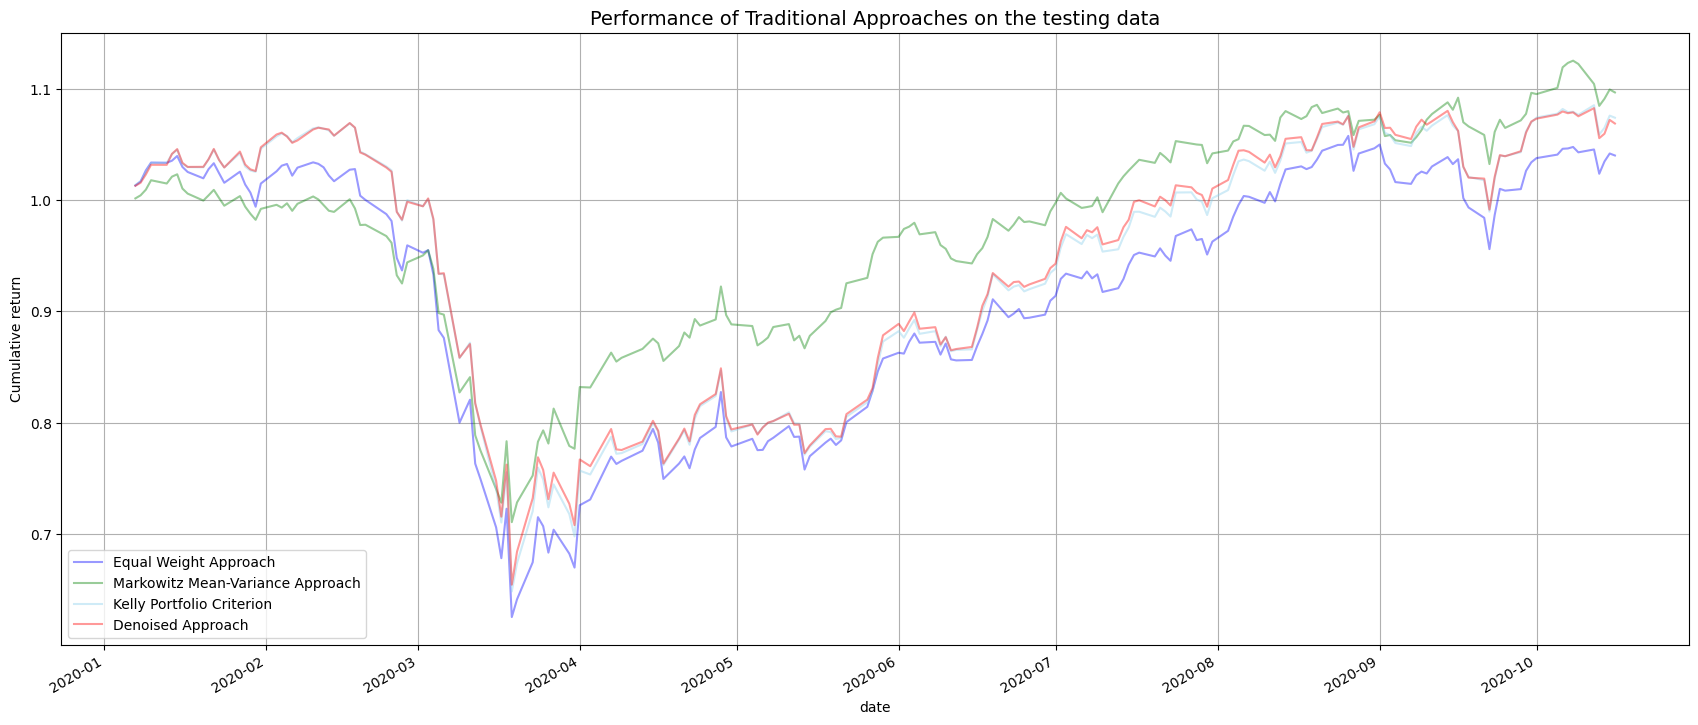

In [ ]:
%matplotlib inline
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
eq_test_cum_returns.plot(ax=ax, color='blue', alpha=.4)
markow_test_cum_returns.plot(ax=ax, color='green', alpha=.4)
kelly_test_cum_returns.plot(ax=ax, color='skyblue', alpha=.4)
denoised_test_cum_returns.plot(ax=ax, color='red', alpha=0.4)

plt.legend(loc="best");
plt.grid(True)
ax.set_ylabel("Cumulative return");
ax.set_title("Performance of Traditional Approaches on the testing data", fontsize=14);

<hr style='border:2px solid black'>

## **Section 9: Performance Analysis of all traditional and RL agents**


<hr style='border:2px solid black'>

We analyse the performance of all trading agents - traditional and RL based in this section. We first evaluate against the training data (in the sample).

In [ ]:
dict = {'Approach ' : ["Markowitz", "Kelly", "Denoising", "Equal weighted", "", "A2C - TI","PPO - TI", "DDPG - TI", "SAC - TI", "TD3 - TI","", "A2C - RET","PPO - RET ", "DDPG - RET ", "SAC - RET ", "TD3 - RET ","", "A2C - LSTM ","PPO - LSTM ", "DDPG - LSTM ", "SAC - LSTM ", "TD3 - LSTM ","", "A2C - Transformer ","PPO - Transformer ", "DDPG - Transformer ", "SAC - Transformer ", "TD3 - Transformer "  ],
        'Initial Capital' : [np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4),"",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4)],
        'Total Gain' : [np.round(total_return_trg_markow, 4), np.round(total_return_trg_kelly, 4), np.round(total_return_trg_denoised, 4),np.round(total_return_trg_eq, 4),"",  np.round(total_return_trg_a2c_ti, 4), np.round(total_return_trg_ppo_ti, 4), np.round(total_return_trg_ddpg_ti, 4), np.round(total_return_trg_sac_ti, 4), np.round(total_return_trg_td3_ti, 4) ,"",  np.round(total_return_trg_a2c_ret, 4), np.round(total_return_trg_ppo_ret, 4), np.round(total_return_trg_ddpg_ret, 4), np.round(total_return_trg_sac_ret, 4),np.round(total_return_trg_td3_ret, 4) ,"",  np.round(total_return_trg_a2c_lstm, 4), np.round(total_return_trg_ppo_lstm, 4), np.round(total_return_trg_ddpg_lstm, 4), np.round(total_return_trg_sac_lstm, 4),np.round(total_return_trg_td3_lstm, 4),"",  np.round(total_return_trg_a2c_transformer, 4), np.round(total_return_trg_ppo_transformer, 4), np.round(total_return_trg_ddpg_transformer, 4), np.round(total_return_trg_sac_transformer, 4),np.round(total_return_trg_td3_transformer, 4)],
        'Final Capital' : [np.round(final_value_trg_markow, 4), np.round(final_value_trg_kelly, 4), np.round(final_value_trg_denoised, 4),np.round(final_value_trg_eq, 4),"",  np.round(final_value_trg_a2c_ti, 4), np.round(final_value_trg_ppo_ti, 4), np.round(final_value_trg_ddpg_ti, 4), np.round(final_value_trg_sac_ti, 4),np.round(final_value_trg_td3_ti, 4) ,"",  np.round(final_value_trg_a2c_ret, 4), np.round(final_value_trg_ppo_ret, 4), np.round(final_value_trg_ddpg_ret, 4), np.round(final_value_trg_sac_ret, 4),np.round(final_value_trg_td3_ret, 4),"",  np.round(final_value_trg_a2c_lstm, 4), np.round(final_value_trg_ppo_lstm, 4), np.round(final_value_trg_ddpg_lstm, 4), np.round(final_value_trg_sac_lstm, 4),np.round(final_value_trg_td3_lstm, 4),"",  np.round(final_value_trg_a2c_transformer, 4), np.round(final_value_trg_ppo_transformer, 4), np.round(final_value_trg_ddpg_transformer, 4), np.round(final_value_trg_sac_transformer, 4),np.round(final_value_trg_td3_transformer, 4)],
        'Annualized Return' : [np.round(annualized_return_trg_markow, 4), np.round(annualized_return_trg_kelly, 4), np.round(annualized_return_trg_denoised, 4),np.round(annualized_return_trg_eq, 4),"",  np.round(annualized_return_trg_a2c_ti, 4), np.round(annualized_return_trg_ppo_ti, 4), np.round(annualized_return_trg_ddpg_ti, 4), np.round(annualized_return_trg_sac_ti, 4),np.round(annualized_return_trg_td3_ti, 4) ,"",  np.round(annualized_return_trg_a2c_ret, 4), np.round(annualized_return_trg_ppo_ret, 4), np.round(annualized_return_trg_ddpg_ret, 4), np.round(annualized_return_trg_sac_ret, 4),np.round(annualized_return_trg_td3_ret, 4) ,"",  np.round(annualized_return_trg_a2c_lstm, 4), np.round(annualized_return_trg_ppo_lstm, 4), np.round(annualized_return_trg_ddpg_lstm, 4), np.round(annualized_return_trg_sac_lstm, 4),np.round(annualized_return_trg_td3_lstm, 4) ,"",  np.round(annualized_return_trg_a2c_transformer, 4), np.round(annualized_return_trg_ppo_transformer, 4), np.round(annualized_return_trg_ddpg_transformer, 4), np.round(annualized_return_trg_sac_transformer, 4),np.round(annualized_return_trg_td3_transformer, 4)],
        'Sharpe Ratio (SR)' : [np.round(sharpe_ratio_trg_markow, 4), np.round(sharpe_ratio_trg_kelly, 4), np.round(sharpe_ratio_trg_denoised, 4), np.round(sharpe_ratio_trg_eq, 4),"",  np.round(sharpe_ratio_trg_a2c_ti, 4), np.round(sharpe_ratio_trg_ppo_ti, 4), np.round(sharpe_ratio_trg_ddpg_ti, 4), np.round(sharpe_ratio_trg_sac_ti, 4),np.round(sharpe_ratio_trg_td3_ti, 4) ,"",  np.round(sharpe_ratio_trg_a2c_ret, 4),np.round(sharpe_ratio_trg_ppo_ret, 4), np.round(sharpe_ratio_trg_ddpg_ret, 4), np.round(sharpe_ratio_trg_sac_ret, 4),np.round(sharpe_ratio_trg_td3_ret, 4) ,"",  np.round(sharpe_ratio_trg_a2c_lstm, 4),np.round(sharpe_ratio_trg_ppo_lstm, 4), np.round(sharpe_ratio_trg_ddpg_lstm, 4), np.round(sharpe_ratio_trg_sac_lstm, 4),np.round(sharpe_ratio_trg_td3_lstm, 4),"",  np.round(sharpe_ratio_trg_a2c_transformer, 4),np.round(sharpe_ratio_trg_ppo_transformer, 4), np.round(sharpe_ratio_trg_ddpg_transformer, 4), np.round(sharpe_ratio_trg_sac_transformer, 4),np.round(sharpe_ratio_trg_td3_transformer, 4)],
        'Maximum Drawdown(%)' : [np.round(maxdraw_trg_markow, 4), np.round(maxdraw_trg_kelly, 4), np.round(maxdraw_trg_denoised, 4), np.round(maxdraw_trg_eq, 4),"",  np.round(maxdraw_trg_a2c_ti, 4),np.round(maxdraw_trg_ppo_ti, 4), np.round(maxdraw_trg_ddpg_ti, 4), np.round(maxdraw_trg_sac_ti, 4),np.round(maxdraw_trg_td3_ti, 4) ,"",  np.round(maxdraw_trg_a2c_ret, 4),np.round(maxdraw_trg_ppo_ret, 4), np.round(maxdraw_trg_ddpg_ret, 4), np.round(maxdraw_trg_sac_ret, 4),np.round(maxdraw_trg_td3_ret, 4) ,"",  np.round(maxdraw_trg_a2c_lstm, 4),np.round(maxdraw_trg_ppo_lstm, 4), np.round(maxdraw_trg_ddpg_lstm, 4), np.round(maxdraw_trg_sac_lstm, 4),np.round(maxdraw_trg_td3_lstm, 4),"",  np.round(maxdraw_trg_a2c_transformer, 4),np.round(maxdraw_trg_ppo_transformer, 4), np.round(maxdraw_trg_ddpg_transformer, 4), np.round(maxdraw_trg_sac_transformer, 4),np.round(maxdraw_trg_td3_transformer, 4)]}

df = pd.DataFrame(dict, index = None)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='heavy_grid', showindex=False)
print(pdtabulate(df))

In [ ]:
display(HTML(df.to_html()))

,Approach,Initial Capital,Total Gain,Final Capital,Annualized Return,Sharpe Ratio (SR),Maximum Drawdown(%)
0,Markowitz,100,57.457,157.457,0.1672,1.6205,-9.7889
1,Kelly,100,144.1526,244.1526,0.3552,2.3079,-14.9139
2,Denoising,100,156.4364,256.4364,0.3781,2.4163,-15.5711
3,Equal weighted,100,78.3865,178.3865,0.2179,1.5403,-12.8146
4,,,,,,,
5,A2C - TI,100,71.855,171.855,0.2025,1.4009,-11.4562
6,PPO - TI,100,86.763,186.763,0.237,1.6373,-12.7729
7,DDPG - TI,100,88.274,188.274,0.2404,1.6038,-12.6296
8,SAC - TI,100,82.7332,182.7332,0.2279,1.665,-12.5526
9,TD3 - TI,100,81.7874,181.7874,0.2257,1.5565,-12.3037


More critically, we also analyse the performance of all these algorithms against out-of-sample data (testing data).

In [ ]:
dict = {'Approach ' : ["Markowitz", "Kelly", "Denoising", "Equal weighted", "", "A2C - TI","PPO - TI", "DDPG - TI", "SAC - TI", "TD3 - TI","", "A2C - RET","PPO - RET ", "DDPG - RET ", "SAC - RET ", "TD3 - RET ","", "A2C - LSTM ","PPO - LSTM ", "DDPG - LSTM ", "SAC - LSTM ", "TD3 - LSTM ","", "A2C - Transformer ","PPO - Transformer ", "DDPG - Transformer ", "SAC - Transformer ", "TD3 - Transformer "  ],
        'Initial Capital' : [np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4),"",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4)],
        'Total Gain' : [np.round(total_return_test_markow, 4), np.round(total_return_test_kelly, 4), np.round(total_return_test_denoised, 4),np.round(total_return_test_eq, 4),"",  np.round(total_return_test_a2c_ti, 4), np.round(total_return_test_ppo_ti, 4), np.round(total_return_test_ddpg_ti, 4), np.round(total_return_test_sac_ti, 4), np.round(total_return_test_td3_ti, 4) ,"",  np.round(total_return_test_a2c_ret, 4), np.round(total_return_test_ppo_ret, 4), np.round(total_return_test_ddpg_ret, 4), np.round(total_return_test_sac_ret, 4),np.round(total_return_test_td3_ret, 4) ,"",  np.round(total_return_test_a2c_lstm, 4), np.round(total_return_test_ppo_lstm, 4), np.round(total_return_test_ddpg_lstm, 4), np.round(total_return_test_sac_lstm, 4),np.round(total_return_test_td3_lstm, 4),"",  np.round(total_return_test_a2c_transformer, 4), np.round(total_return_test_ppo_transformer, 4), np.round(total_return_test_ddpg_transformer, 4), np.round(total_return_test_sac_transformer, 4),np.round(total_return_test_td3_transformer, 4)],
        'Final Capital' : [np.round(final_value_test_markow, 4), np.round(final_value_test_kelly, 4), np.round(final_value_test_denoised, 4),np.round(final_value_test_eq, 4),"",  np.round(final_value_test_a2c_ti, 4), np.round(final_value_test_ppo_ti, 4), np.round(final_value_test_ddpg_ti, 4), np.round(final_value_test_sac_ti, 4),np.round(final_value_test_td3_ti, 4) ,"",  np.round(final_value_test_a2c_ret, 4), np.round(final_value_test_ppo_ret, 4), np.round(final_value_test_ddpg_ret, 4), np.round(final_value_test_sac_ret, 4),np.round(final_value_test_td3_ret, 4),"",  np.round(final_value_test_a2c_lstm, 4), np.round(final_value_test_ppo_lstm, 4), np.round(final_value_test_ddpg_lstm, 4), np.round(final_value_test_sac_lstm, 4),np.round(final_value_test_td3_lstm, 4),"",  np.round(final_value_test_a2c_transformer, 4), np.round(final_value_test_ppo_transformer, 4), np.round(final_value_test_ddpg_transformer, 4), np.round(final_value_test_sac_transformer, 4),np.round(final_value_test_td3_transformer, 4)],
        'Annualized Return' : [np.round(annualized_return_test_markow, 4), np.round(annualized_return_test_kelly, 4), np.round(annualized_return_test_denoised, 4),np.round(annualized_return_test_eq, 4),"",  np.round(annualized_return_test_a2c_ti, 4), np.round(annualized_return_test_ppo_ti, 4), np.round(annualized_return_test_ddpg_ti, 4), np.round(annualized_return_test_sac_ti, 4),np.round(annualized_return_test_td3_ti, 4) ,"",  np.round(annualized_return_test_a2c_ret, 4), np.round(annualized_return_test_ppo_ret, 4), np.round(annualized_return_test_ddpg_ret, 4), np.round(annualized_return_test_sac_ret, 4),np.round(annualized_return_test_td3_ret, 4) ,"",  np.round(annualized_return_test_a2c_lstm, 4), np.round(annualized_return_test_ppo_lstm, 4), np.round(annualized_return_test_ddpg_lstm, 4), np.round(annualized_return_test_sac_lstm, 4),np.round(annualized_return_test_td3_lstm, 4) ,"",  np.round(annualized_return_test_a2c_transformer, 4), np.round(annualized_return_test_ppo_transformer, 4), np.round(annualized_return_test_ddpg_transformer, 4), np.round(annualized_return_test_sac_transformer, 4),np.round(annualized_return_test_td3_transformer, 4)],
        'Sharpe Ratio (SR)' : [np.round(sharpe_ratio_test_markow, 4), np.round(sharpe_ratio_test_kelly, 4), np.round(sharpe_ratio_test_denoised, 4), np.round(sharpe_ratio_test_eq, 4),"",  np.round(sharpe_ratio_test_a2c_ti, 4), np.round(sharpe_ratio_test_ppo_ti, 4), np.round(sharpe_ratio_test_ddpg_ti, 4), np.round(sharpe_ratio_test_sac_ti, 4),np.round(sharpe_ratio_test_td3_ti, 4) ,"",  np.round(sharpe_ratio_test_a2c_ret, 4),np.round(sharpe_ratio_test_ppo_ret, 4), np.round(sharpe_ratio_test_ddpg_ret, 4), np.round(sharpe_ratio_test_sac_ret, 4),np.round(sharpe_ratio_test_td3_ret, 4) ,"",  np.round(sharpe_ratio_test_a2c_lstm, 4),np.round(sharpe_ratio_test_ppo_lstm, 4), np.round(sharpe_ratio_test_ddpg_lstm, 4), np.round(sharpe_ratio_test_sac_lstm, 4),np.round(sharpe_ratio_test_td3_lstm, 4),"",  np.round(sharpe_ratio_test_a2c_transformer, 4),np.round(sharpe_ratio_test_ppo_transformer, 4), np.round(sharpe_ratio_test_ddpg_transformer, 4), np.round(sharpe_ratio_test_sac_transformer, 4),np.round(sharpe_ratio_test_td3_transformer, 4)],
        'Maximum Drawdown(%)' : [np.round(maxdraw_test_markow, 4), np.round(maxdraw_test_kelly, 4), np.round(maxdraw_test_denoised, 4), np.round(maxdraw_test_eq, 4),"",  np.round(maxdraw_test_a2c_ti, 4),np.round(maxdraw_test_ppo_ti, 4), np.round(maxdraw_test_ddpg_ti, 4), np.round(maxdraw_test_sac_ti, 4),np.round(maxdraw_test_td3_ti, 4) ,"",  np.round(maxdraw_test_a2c_ret, 4),np.round(maxdraw_test_ppo_ret, 4), np.round(maxdraw_test_ddpg_ret, 4), np.round(maxdraw_test_sac_ret, 4),np.round(maxdraw_test_td3_ret, 4) ,"",  np.round(maxdraw_test_a2c_lstm, 4),np.round(maxdraw_test_ppo_lstm, 4), np.round(maxdraw_test_ddpg_lstm, 4), np.round(maxdraw_test_sac_lstm, 4),np.round(maxdraw_test_td3_lstm, 4),"",  np.round(maxdraw_test_a2c_transformer, 4),np.round(maxdraw_test_ppo_transformer, 4), np.round(maxdraw_test_ddpg_transformer, 4), np.round(maxdraw_test_sac_transformer, 4),np.round(maxdraw_test_td3_transformer, 4)]}

df = pd.DataFrame(dict, index = None)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='heavy_grid', showindex=False)
print(pdtabulate(df))


In [ ]:
display(HTML(df.to_html()))

,Approach,Initial Capital,Total Gain,Final Capital,Annualized Return,Sharpe Ratio (SR),Maximum Drawdown(%)
0,Markowitz,100,8.866,108.866,0.1154,0.5665,-30.7025
1,Kelly,100,6.3836,106.3836,0.0828,0.4416,-39.4831
2,Denoising,100,5.8665,105.8665,0.0761,0.4239,-38.9256
3,Equal weighted,100,3.0136,103.0136,0.0389,0.324,-40.016
4,,,,,,,
5,A2C - TI,100,5.321,105.321,0.0689,0.3706,-38.413
6,PPO - TI,100,8.672,108.672,0.1129,0.4902,-39.7532
7,DDPG - TI,100,2.8424,102.8424,0.0367,0.2812,-38.9748
8,SAC - TI,100,7.6856,107.6856,0.0999,0.4608,-36.2377
9,TD3 - TI,100,6.0391,106.0391,0.0783,0.3977,-38.0432


<hr style='border:2px solid black'>

## **Section 10: The DynaCAAST Framework for RL based trading agents (Testing Data)**


<hr style='border:2px solid black'>

We now review the performance of DynaCAAST Framework on testing dataset. First we clear any old elements in dictionaries for holding environments and observations.

In [ ]:
DynaCAAST_Env.clear()
DynaCAAST_Obs.clear()

Now we prepare multiple environments for running our various RL algorithms. We need multiple environments as each RL agent uses its own state space and requires correspondingly defined environment.

In [ ]:
env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": ti_abbreviations,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = test_data_ti , **env_kwargs)
env_a2c_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_ti'] = copy.copy(env_a2c_ti)
DynaCAAST_Obs['a2c_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_ppo_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_ti'] = copy.copy(env_ppo_ti)
DynaCAAST_Obs['ppo_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_ddpg_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_ti'] = copy.copy(env_ddpg_ti)
DynaCAAST_Obs['ddpg_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_sac_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_ti'] = copy.copy(env_sac_ti)
DynaCAAST_Obs['sac_ti'] = copy.copy(obs_trade)

e_trade_gym = StockPortfolioEnv(df = test_data_ti, **env_kwargs)
env_td3_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_ti'] = copy.copy(env_td3_ti)
DynaCAAST_Obs['td3_ti'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": return_lags,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = test_data_ret , **env_kwargs)
env_a2c_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_ret'] = copy.copy(env_a2c_ret)
DynaCAAST_Obs['a2c_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_ppo_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_ret'] = copy.copy(env_ppo_ret)
DynaCAAST_Obs['ppo_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_ddpg_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_ret'] = copy.copy(env_ddpg_ret)
DynaCAAST_Obs['ddpg_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_sac_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_ret'] = copy.copy(env_sac_ret)
DynaCAAST_Obs['sac_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_ret, **env_kwargs)
env_td3_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_ret'] = copy.copy(env_td3_ret)
DynaCAAST_Obs['td3_ret'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": lstm_fcst,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = test_data_lstm , **env_kwargs)
env_a2c_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_lstm'] = copy.copy(env_a2c_lstm)
DynaCAAST_Obs['a2c_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_ppo_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_lstm'] = copy.copy(env_ppo_lstm)
DynaCAAST_Obs['ppo_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_ddpg_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_lstm'] = copy.copy(env_ddpg_lstm)
DynaCAAST_Obs['ddpg_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_sac_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_lstm'] = copy.copy(env_sac_lstm)
DynaCAAST_Obs['sac_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_lstm, **env_kwargs)
env_td3_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_lstm'] = copy.copy(env_td3_lstm)
DynaCAAST_Obs['td3_lstm'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": transformer_fcst,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = test_data_transformer , **env_kwargs)
env_a2c_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_transformer'] = copy.copy(env_a2c_transformer)
DynaCAAST_Obs['a2c_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_ppo_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_transformer'] = copy.copy(env_ppo_transformer)
DynaCAAST_Obs['ppo_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_ddpg_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_transformer'] = copy.copy(env_ddpg_transformer)
DynaCAAST_Obs['ddpg_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_sac_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_transformer'] = copy.copy(env_sac_transformer)
DynaCAAST_Obs['sac_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = test_data_transformer, **env_kwargs)
env_td3_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_transformer'] = copy.copy(env_td3_transformer)
DynaCAAST_Obs['td3_transformer'] = obs_trade.copy()

Below we create our DynaCAAST framework and run it on the testing data. We then evaluate the performance of DynaCAAST Framework with all other RL agents and traditional approaches.

In [ ]:
dyna_portfolio_weights = [np.array([1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27,1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27])]
dyna_portfolio_values  = [100]
dyna_portfolio_returns = [0]
reset_iter = 0
last_data_values = np.array([0, 0, 0])

for i in range(len(test_data_lstm.index.unique())):
  max_rewards = []
  max_weights = []
  data_values = 0
  arg_max = 0

  for model, env, obs in zip(list(DynaCAAST_Model.values()), list(DynaCAAST_Env.values()), list(DynaCAAST_Obs.values())):
    if reset_iter == 0:
      env.reset()
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    max_rewards.append(rewards)
    weights = env.env_method(method_name="getWeights")
    max_weights.append(weights)

  reset_iter = 1

  data_values = np.squeeze(env.env_method(method_name="getDataCloseValues"))

  prev_portfolio_value = dyna_portfolio_values[-1]

  arg_max = np.argmax(np.array(max_rewards))

  curr_weights = max_weights[arg_max]

  dyna_portfolio_weights.append(curr_weights)

  if last_data_values.all() == 0:
    new_portfolio_value = prev_portfolio_value
    last_data_values = data_values.copy()
  else:
    new_portfolio_value = np.sum((data_values/last_data_values) * np.array(dyna_portfolio_weights[-1])) * prev_portfolio_value
    trans_cost = np.sum(np.absolute((data_values/last_data_values) * (np.array(dyna_portfolio_weights[-1]) -  np.array(dyna_portfolio_weights[-2]))))*transaction_cost
    new_portfolio_value = new_portfolio_value - abs(trans_cost)
    last_data_values = data_values.copy()

  portfolio_return = new_portfolio_value/prev_portfolio_value -1
  dyna_portfolio_values.append(new_portfolio_value)
  dyna_portfolio_returns.append(portfolio_return)

In [ ]:
test_data_dyna = pd.DataFrame({'daily_return':dyna_portfolio_returns[:-1],
                               'Date':list(test_data_lstm.date.unique()) })

In [ ]:
test_data_dyna.set_index(['Date'], inplace=True)

Once we have the daily returns from DynaCAAST frameowork, we visualize the performance graphically.

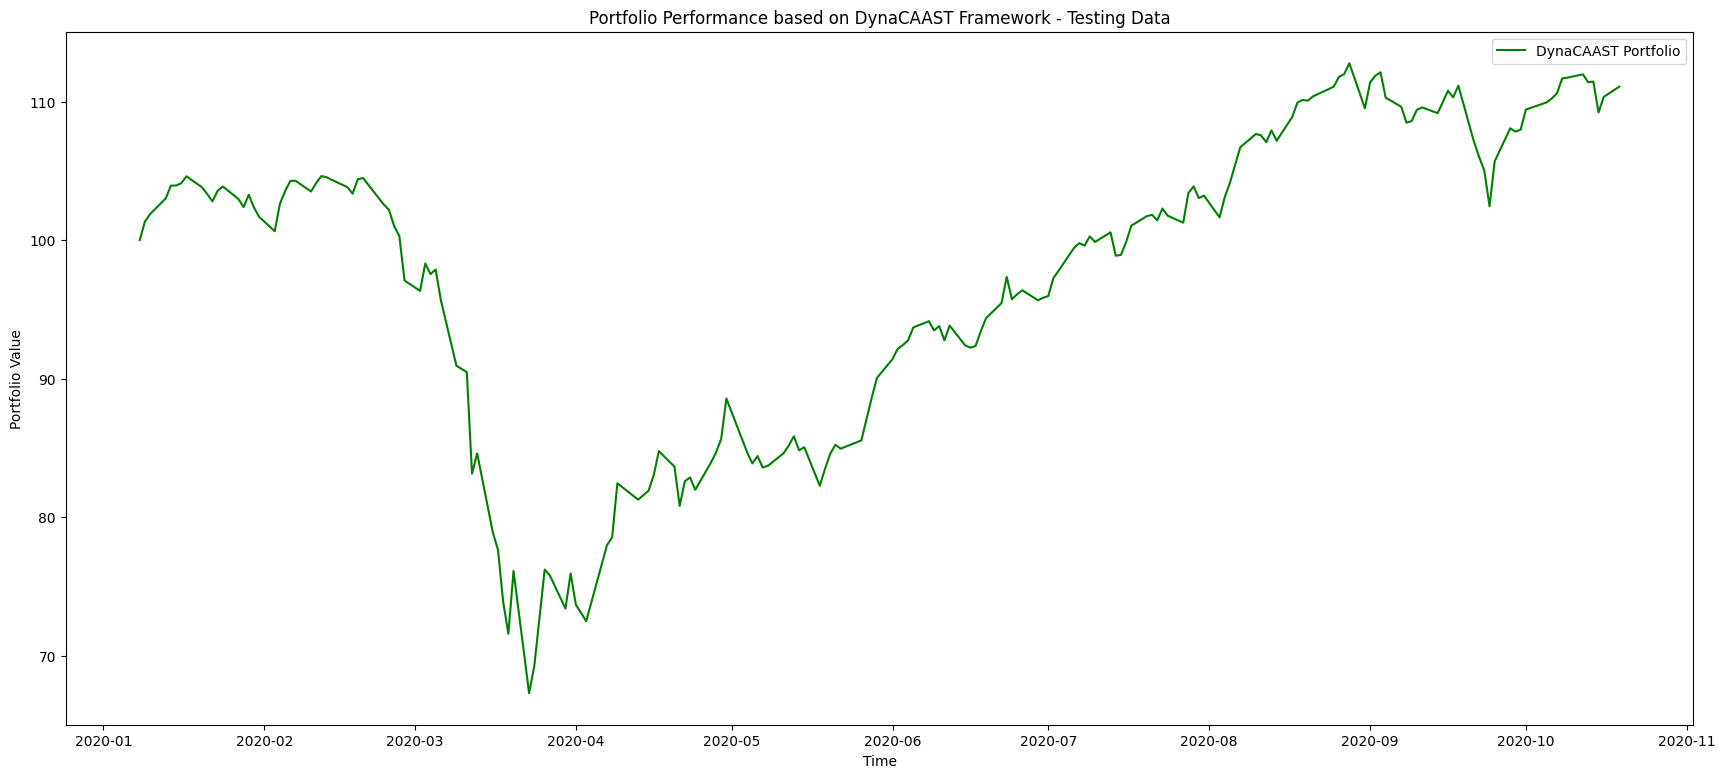

Final Portfolio Value: 111.08
Total Return: 11.08
Annualized Return: 14.46%
Sharpe Ratio: 0.5891
Maximum draw down(%): -35.6797


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(test_data_dyna)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = test_data_dyna['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(td3_test_returns_lstm["date"][1:], portfolio_values, label="DynaCAAST Portfolio", color="green")
plt.title("Portfolio Performance based on DynaCAAST Framework - Testing Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_test["return_dyna"] = portfolio_returns

# Calculate performance metrics
final_value_test_dyna = capital
total_return_test_dyna = final_value_test_dyna - initial_capital
sharpe_ratio_test_dyna = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_test_dyna = (final_value_test_dyna / initial_capital) ** (1 / (len(test_data_dyna) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_test_dyna = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_test_dyna:.2f}")
print(f"Total Return: {total_return_test_dyna:.2f}")
print(f"Annualized Return: {annualized_return_test_dyna * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_test_dyna:.4f}")
print(f"Maximum draw down(%): {maxdraw_test_dyna:.4f}")

We evaluate performance of all approaches including the DynaCAAST framework

In [ ]:
dict = {'Approach ' : ["Markowitz", "Kelly", "Denoising", "Equal weighted", "", "A2C - TI","PPO - TI", "DDPG - TI", "SAC - TI", "TD3 - TI","", "A2C - RET","PPO - RET ", "DDPG - RET ", "SAC - RET ", "TD3 - RET ","", "A2C - LSTM ","PPO - LSTM ", "DDPG - LSTM ", "SAC - LSTM ", "TD3 - LSTM ","", "A2C - Transformer ","PPO - Transformer ", "DDPG - Transformer ", "SAC - Transformer ", "TD3 - Transformer " , "", "DynaCAAST "  ],
        'Initial Capital' : [np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4),"",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4), np.round(100, 4), np.round(100, 4), np.round(100, 4),np.round(100, 4), "",  np.round(100, 4)],
        'Total Gain' : [np.round(total_return_test_markow, 4), np.round(total_return_test_kelly, 4), np.round(total_return_test_denoised, 4),np.round(total_return_test_eq, 4),"",  np.round(total_return_test_a2c_ti, 4), np.round(total_return_test_ppo_ti, 4), np.round(total_return_test_ddpg_ti, 4), np.round(total_return_test_sac_ti, 4), np.round(total_return_test_td3_ti, 4) ,"",  np.round(total_return_test_a2c_ret, 4), np.round(total_return_test_ppo_ret, 4), np.round(total_return_test_ddpg_ret, 4), np.round(total_return_test_sac_ret, 4),np.round(total_return_test_td3_ret, 4) ,"",  np.round(total_return_test_a2c_lstm, 4), np.round(total_return_test_ppo_lstm, 4), np.round(total_return_test_ddpg_lstm, 4), np.round(total_return_test_sac_lstm, 4),np.round(total_return_test_td3_lstm, 4),"",  np.round(total_return_test_a2c_transformer, 4), np.round(total_return_test_ppo_transformer, 4), np.round(total_return_test_ddpg_transformer, 4), np.round(total_return_test_sac_transformer, 4),np.round(total_return_test_td3_transformer, 4), "", np.round(total_return_test_dyna, 4)],
        'Final Capital' : [np.round(final_value_test_markow, 4), np.round(final_value_test_kelly, 4), np.round(final_value_test_denoised, 4),np.round(final_value_test_eq, 4),"",  np.round(final_value_test_a2c_ti, 4), np.round(final_value_test_ppo_ti, 4), np.round(final_value_test_ddpg_ti, 4), np.round(final_value_test_sac_ti, 4),np.round(final_value_test_td3_ti, 4) ,"",  np.round(final_value_test_a2c_ret, 4), np.round(final_value_test_ppo_ret, 4), np.round(final_value_test_ddpg_ret, 4), np.round(final_value_test_sac_ret, 4),np.round(final_value_test_td3_ret, 4),"",  np.round(final_value_test_a2c_lstm, 4), np.round(final_value_test_ppo_lstm, 4), np.round(final_value_test_ddpg_lstm, 4), np.round(final_value_test_sac_lstm, 4),np.round(final_value_test_td3_lstm, 4),"",  np.round(final_value_test_a2c_transformer, 4), np.round(final_value_test_ppo_transformer, 4), np.round(final_value_test_ddpg_transformer, 4), np.round(final_value_test_sac_transformer, 4),np.round(final_value_test_td3_transformer, 4), "", np.round(final_value_test_dyna, 4)],
        'Annualized Return' : [np.round(annualized_return_test_markow, 4), np.round(annualized_return_test_kelly, 4), np.round(annualized_return_test_denoised, 4),np.round(annualized_return_test_eq, 4),"",  np.round(annualized_return_test_a2c_ti, 4), np.round(annualized_return_test_ppo_ti, 4), np.round(annualized_return_test_ddpg_ti, 4), np.round(annualized_return_test_sac_ti, 4),np.round(annualized_return_test_td3_ti, 4) ,"",  np.round(annualized_return_test_a2c_ret, 4), np.round(annualized_return_test_ppo_ret, 4), np.round(annualized_return_test_ddpg_ret, 4), np.round(annualized_return_test_sac_ret, 4),np.round(annualized_return_test_td3_ret, 4) ,"",  np.round(annualized_return_test_a2c_lstm, 4), np.round(annualized_return_test_ppo_lstm, 4), np.round(annualized_return_test_ddpg_lstm, 4), np.round(annualized_return_test_sac_lstm, 4),np.round(annualized_return_test_td3_lstm, 4) ,"",  np.round(annualized_return_test_a2c_transformer, 4), np.round(annualized_return_test_ppo_transformer, 4), np.round(annualized_return_test_ddpg_transformer, 4), np.round(annualized_return_test_sac_transformer, 4),np.round(annualized_return_test_td3_transformer, 4), "", np.round(annualized_return_test_dyna, 4)],
        'Sharpe Ratio (SR)' : [np.round(sharpe_ratio_test_markow, 4), np.round(sharpe_ratio_test_kelly, 4), np.round(sharpe_ratio_test_denoised, 4), np.round(sharpe_ratio_test_eq, 4),"",  np.round(sharpe_ratio_test_a2c_ti, 4), np.round(sharpe_ratio_test_ppo_ti, 4), np.round(sharpe_ratio_test_ddpg_ti, 4), np.round(sharpe_ratio_test_sac_ti, 4),np.round(sharpe_ratio_test_td3_ti, 4) ,"",  np.round(sharpe_ratio_test_a2c_ret, 4),np.round(sharpe_ratio_test_ppo_ret, 4), np.round(sharpe_ratio_test_ddpg_ret, 4), np.round(sharpe_ratio_test_sac_ret, 4),np.round(sharpe_ratio_test_td3_ret, 4) ,"",  np.round(sharpe_ratio_test_a2c_lstm, 4),np.round(sharpe_ratio_test_ppo_lstm, 4), np.round(sharpe_ratio_test_ddpg_lstm, 4), np.round(sharpe_ratio_test_sac_lstm, 4),np.round(sharpe_ratio_test_td3_lstm, 4),"",  np.round(sharpe_ratio_test_a2c_transformer, 4),np.round(sharpe_ratio_test_ppo_transformer, 4), np.round(sharpe_ratio_test_ddpg_transformer, 4), np.round(sharpe_ratio_test_sac_transformer, 4),np.round(sharpe_ratio_test_td3_transformer, 4), "", np.round(sharpe_ratio_test_dyna, 4)],
        'Maximum Drawdown(%)' : [np.round(maxdraw_test_markow, 4), np.round(maxdraw_test_kelly, 4), np.round(maxdraw_test_denoised, 4), np.round(maxdraw_test_eq, 4),"",  np.round(maxdraw_test_a2c_ti, 4),np.round(maxdraw_test_ppo_ti, 4), np.round(maxdraw_test_ddpg_ti, 4), np.round(maxdraw_test_sac_ti, 4),np.round(maxdraw_test_td3_ti, 4) ,"",  np.round(maxdraw_test_a2c_ret, 4),np.round(maxdraw_test_ppo_ret, 4), np.round(maxdraw_test_ddpg_ret, 4), np.round(maxdraw_test_sac_ret, 4),np.round(maxdraw_test_td3_ret, 4) ,"",  np.round(maxdraw_test_a2c_lstm, 4),np.round(maxdraw_test_ppo_lstm, 4), np.round(maxdraw_test_ddpg_lstm, 4), np.round(maxdraw_test_sac_lstm, 4),np.round(maxdraw_test_td3_lstm, 4),"",  np.round(maxdraw_test_a2c_transformer, 4),np.round(maxdraw_test_ppo_transformer, 4), np.round(maxdraw_test_ddpg_transformer, 4), np.round(maxdraw_test_sac_transformer, 4),np.round(maxdraw_test_td3_transformer, 4), "", np.round(maxdraw_test_dyna, 4)]}

df = pd.DataFrame(dict, index = None)
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='heavy_grid', showindex=False)
print(pdtabulate(df))

In [ ]:
display(HTML(df.to_html()))

,Approach,Initial Capital,Total Gain,Final Capital,Annualized Return,Sharpe Ratio (SR),Maximum Drawdown(%)
0,Markowitz,100,8.866,108.866,0.1154,0.5665,-30.7025
1,Kelly,100,6.3836,106.3836,0.0828,0.4416,-39.4831
2,Denoising,100,5.8665,105.8665,0.0761,0.4239,-38.9256
3,Equal weighted,100,3.0136,103.0136,0.0389,0.324,-40.016
4,,,,,,,
5,A2C - TI,100,5.321,105.321,0.0689,0.3706,-38.413
6,PPO - TI,100,8.672,108.672,0.1129,0.4902,-39.7532
7,DDPG - TI,100,2.8424,102.8424,0.0367,0.2812,-38.9748
8,SAC - TI,100,7.6856,107.6856,0.0999,0.4608,-36.2377
9,TD3 - TI,100,6.0391,106.0391,0.0783,0.3977,-38.0432


## **Section 11: The DynaCAAST Framework for RL based trading agents (vs. NIFTY 50 Index)**


<hr style='border:2px solid black'>

We now benchmark our DynaCAAST algorithm against NIFTY 50 index. That is we compare how our DynaCAAST framework fared versus an investor just holding the Nifty 50 index. For this purpose, we clear our environment and observation dictionaries.

In [ ]:
DynaCAAST_Env.clear()
DynaCAAST_Obs.clear()

We now create multiple environments for training datasets for our RL agents. We need this as we want to evaluate our DynaCAAST framework against Nifty 50 index for the entire duration of the time period.

In [ ]:
env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": ti_abbreviations,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = train_data_ti , **env_kwargs)
env_a2c_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_ti'] = copy.copy(env_a2c_ti)
DynaCAAST_Obs['a2c_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_ppo_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_ti'] = copy.copy(env_ppo_ti)
DynaCAAST_Obs['ppo_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_ddpg_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_ti'] = copy.copy(env_ddpg_ti)
DynaCAAST_Obs['ddpg_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_sac_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_ti'] = copy.copy(env_sac_ti)
DynaCAAST_Obs['sac_ti'] = copy.copy(obs_trade)

e_trade_gym = StockPortfolioEnv(df = train_data_ti, **env_kwargs)
env_td3_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_ti'] = copy.copy(env_td3_ti)
DynaCAAST_Obs['td3_ti'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": return_lags,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = train_data_ret , **env_kwargs)
env_a2c_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_ret'] = copy.copy(env_a2c_ret)
DynaCAAST_Obs['a2c_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_ppo_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_ret'] = copy.copy(env_ppo_ret)
DynaCAAST_Obs['ppo_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_ddpg_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_ret'] = copy.copy(env_ddpg_ret)
DynaCAAST_Obs['ddpg_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_sac_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_ret'] = copy.copy(env_sac_ret)
DynaCAAST_Obs['sac_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_ret, **env_kwargs)
env_td3_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_ret'] = copy.copy(env_td3_ret)
DynaCAAST_Obs['td3_ret'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": lstm_fcst,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = train_data_lstm , **env_kwargs)
env_a2c_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_lstm'] = copy.copy(env_a2c_lstm)
DynaCAAST_Obs['a2c_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_ppo_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_lstm'] = copy.copy(env_ppo_lstm)
DynaCAAST_Obs['ppo_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_ddpg_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_lstm'] = copy.copy(env_ddpg_lstm)
DynaCAAST_Obs['ddpg_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_sac_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_lstm'] = copy.copy(env_sac_lstm)
DynaCAAST_Obs['sac_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_lstm, **env_kwargs)
env_td3_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_lstm'] = copy.copy(env_td3_lstm)
DynaCAAST_Obs['td3_lstm'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": transformer_fcst,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = train_data_transformer , **env_kwargs)
env_a2c_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_transformer'] = copy.copy(env_a2c_transformer)
DynaCAAST_Obs['a2c_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_ppo_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_transformer'] = copy.copy(env_ppo_transformer)
DynaCAAST_Obs['ppo_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_ddpg_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_transformer'] = copy.copy(env_ddpg_transformer)
DynaCAAST_Obs['ddpg_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_sac_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_transformer'] = copy.copy(env_sac_transformer)
DynaCAAST_Obs['sac_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = train_data_transformer, **env_kwargs)
env_td3_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_transformer'] = copy.copy(env_td3_transformer)
DynaCAAST_Obs['td3_transformer'] = obs_trade.copy()

We now run our DynaCAAST framework below.

In [ ]:
dyna_portfolio_weights = [np.array([1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27,1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27])]
dyna_portfolio_values  = [100]
dyna_portfolio_returns = [0]
reset_iter = 0
last_data_values = np.array([0, 0, 0])

for i in range(len(train_data_lstm.index.unique())):
  max_rewards = []
  max_weights = []
  data_values = 0
  arg_max = 0

  for model, env, obs in zip(list(DynaCAAST_Model.values()), list(DynaCAAST_Env.values()), list(DynaCAAST_Obs.values())):
    if reset_iter == 0:
      env.reset()
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    max_rewards.append(rewards)
    weights = env.env_method(method_name="getWeights")
    max_weights.append(weights)

  reset_iter = 1

  data_values = np.squeeze(env.env_method(method_name="getDataCloseValues"))

  prev_portfolio_value = dyna_portfolio_values[-1]

  arg_max = np.argmax(np.array(max_rewards))

  curr_weights = max_weights[arg_max]

  dyna_portfolio_weights.append(curr_weights)

  if last_data_values.all() == 0:
    new_portfolio_value = prev_portfolio_value
    last_data_values = data_values.copy()
  else:
    new_portfolio_value = np.sum((data_values/last_data_values) * np.array(dyna_portfolio_weights[-1])) * prev_portfolio_value
    trans_cost = np.sum(np.absolute((data_values/last_data_values) * (np.array(dyna_portfolio_weights[-1]) -  np.array(dyna_portfolio_weights[-2]))))*transaction_cost
    new_portfolio_value = new_portfolio_value - abs(trans_cost)
    last_data_values = data_values.copy()

  portfolio_return = new_portfolio_value/prev_portfolio_value -1
  dyna_portfolio_values.append(new_portfolio_value)
  dyna_portfolio_returns.append(portfolio_return)

In [ ]:
train_data_dyna = pd.DataFrame({'daily_return':dyna_portfolio_returns[:-1],
                               'Date':list(train_data_lstm.date.unique()) })

In [ ]:
train_data_dyna.set_index(['Date'], inplace=True)

We visualize the performance of the DynaCAAST framework against training set.

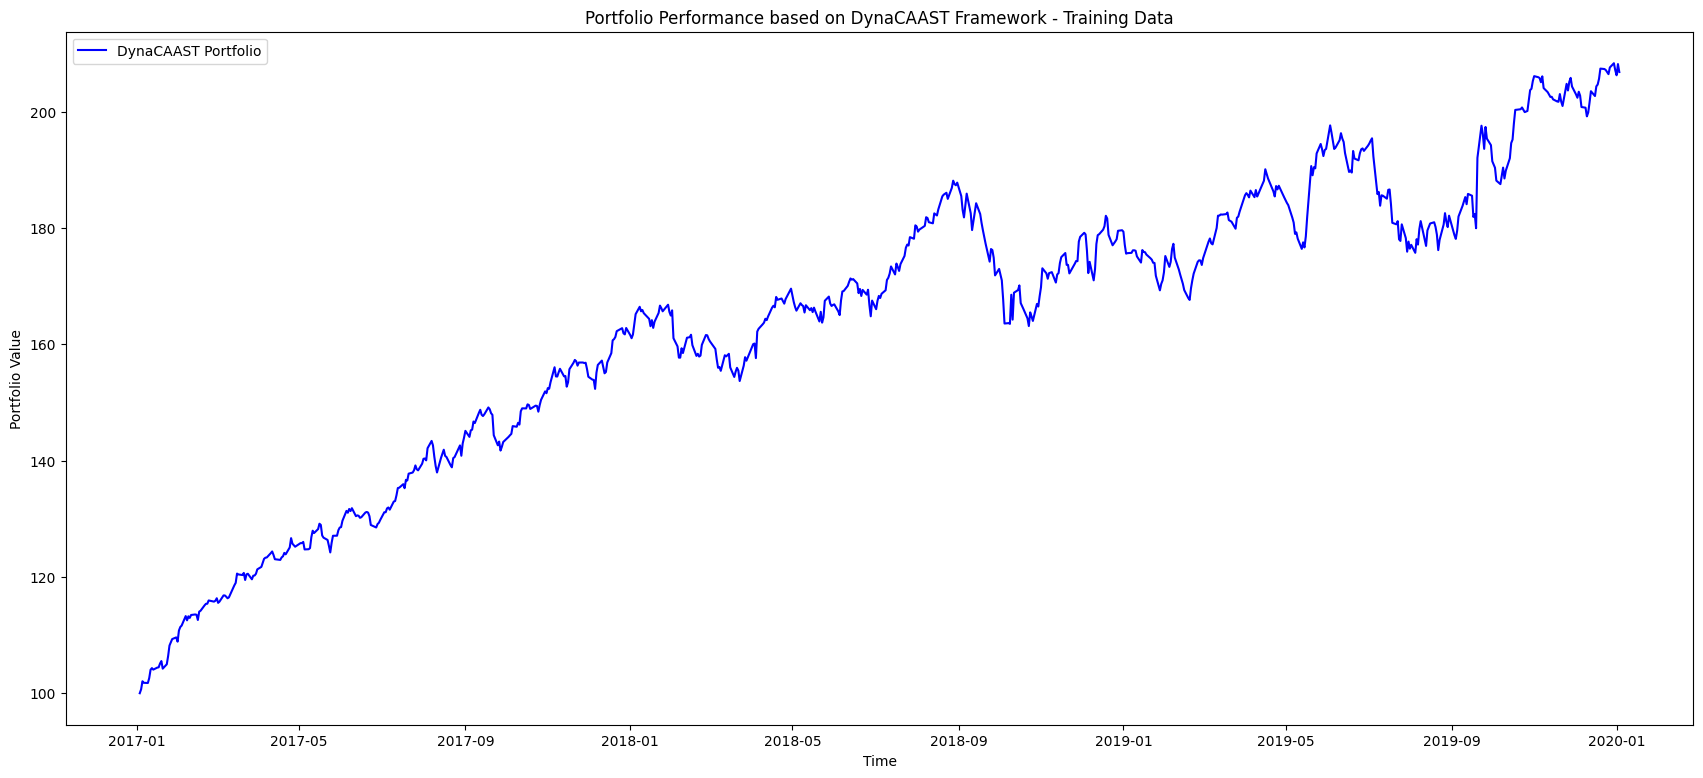

Final Portfolio Value: 206.84
Total Return: 106.84
Annualized Return: 28.08%
Sharpe Ratio: 1.7873
Maximum draw down(%): -13.2876


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []

for i in range(1, len(train_data_dyna)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = train_data_dyna['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(td3_train_returns_lstm["date"][1:], portfolio_values, label="DynaCAAST Portfolio", color="blue")
plt.title("Portfolio Performance based on DynaCAAST Framework - Training Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

Strategy_Returns_Data_trg["return_dyna"] = portfolio_returns

# Calculate performance metrics
final_value_train_dyna = capital
total_return_train_dyna = final_value_train_dyna - initial_capital
sharpe_ratio_train_dyna = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_train_dyna = (final_value_train_dyna / initial_capital) ** (1 / (len(train_data_dyna) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_train_dyna = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_train_dyna:.2f}")
print(f"Total Return: {total_return_train_dyna:.2f}")
print(f"Annualized Return: {annualized_return_train_dyna * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_train_dyna:.4f}")
print(f"Maximum draw down(%): {maxdraw_train_dyna:.4f}")

We combine results from training and testing for DynaCAAST to facilitate performance comparison.

In [ ]:
Strategy_Returns_Data = pd.concat([Strategy_Returns_Data_trg, Strategy_Returns_Data_test], ignore_index=False, sort=False)

We join it with nifty data to have our benckmark results.

In [ ]:
Strategy_Returns_Data = pd.concat([Strategy_Returns_Data, nifty_returns], axis=1)
Strategy_Returns_Data = Strategy_Returns_Data.dropna()
Strategy_Returns_Data.index = Strategy_Returns_Data.index.tz_localize("UTC")

We now evaluate DynaCAAST Framework against NIFTY 50 Index below.

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.68,2020-02-13,2020-03-24,2020-08-07,127
1,13.29,2018-08-29,2018-10-24,2019-04-18,167
2,11.09,2019-06-04,2019-08-06,2019-10-18,99
3,9.15,2020-08-31,2020-09-25,NaT,NaN
4,7.87,2018-01-30,2018-03-26,2018-04-20,59


/usr/local/lib/python3.11/dist-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
/usr/local/lib/python3.11/dist-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


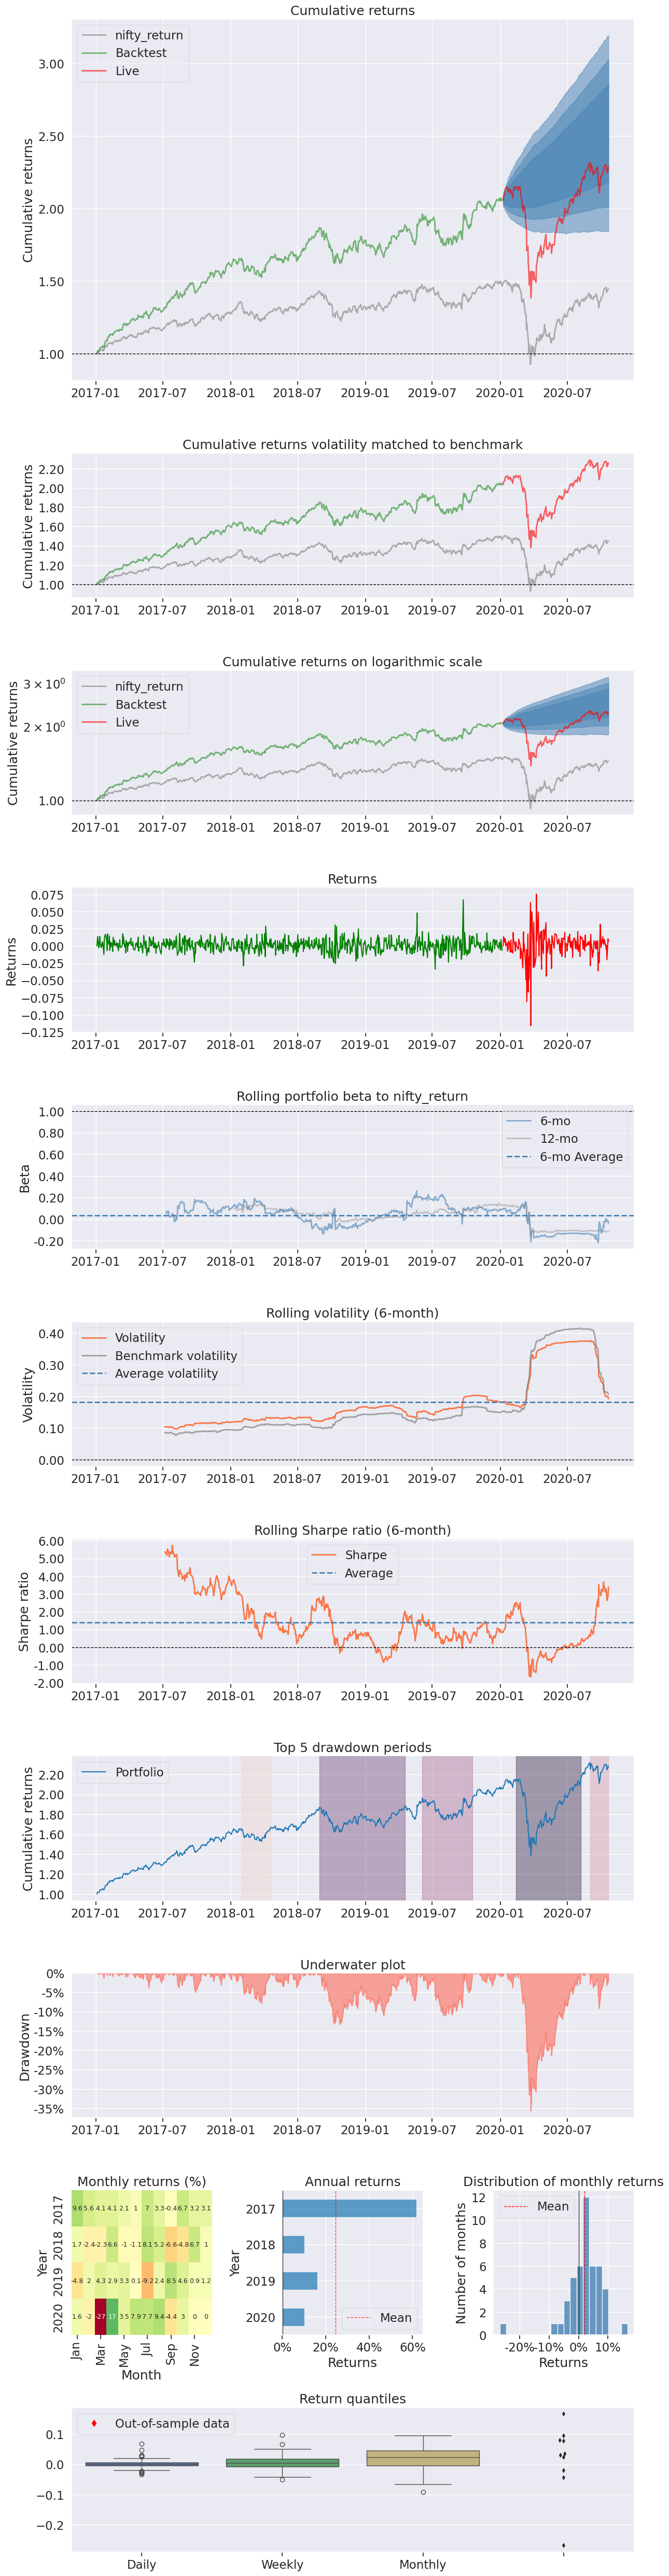

In [ ]:
pf.create_returns_tear_sheet(Strategy_Returns_Data['return_dyna'], benchmark_rets = Strategy_Returns_Data['nifty_return'], live_start_date=cut_off_date)

## **Section 12: The DynaCAAST Framework versus a buy and hold strategy (Validation Data)**


<hr style='border:2px solid black'>

Below utilizing our DynaCAAST framework, we run it again on the validation data to confirm its effectiveness. We then evaluate the performance of DynaCAAST Framework with buy and hold strategy on the validation data.

In [ ]:
DynaCAAST_Env.clear()
DynaCAAST_Obs.clear()

We first create multiple environments based on the validation dataset.

In [ ]:
env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": ti_abbreviations,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = valid_data_ti , **env_kwargs)
env_a2c_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_ti'] = copy.copy(env_a2c_ti)
DynaCAAST_Obs['a2c_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_ti, **env_kwargs)
env_ppo_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_ti'] = copy.copy(env_ppo_ti)
DynaCAAST_Obs['ppo_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_ti, **env_kwargs)
env_ddpg_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_ti'] = copy.copy(env_ddpg_ti)
DynaCAAST_Obs['ddpg_ti'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_ti, **env_kwargs)
env_sac_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_ti'] = copy.copy(env_sac_ti)
DynaCAAST_Obs['sac_ti'] = copy.copy(obs_trade)

e_trade_gym = StockPortfolioEnv(df = valid_data_ti, **env_kwargs)
env_td3_ti, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_ti'] = copy.copy(env_td3_ti)
DynaCAAST_Obs['td3_ti'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": return_lags,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = valid_data_ret , **env_kwargs)
env_a2c_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_ret'] = copy.copy(env_a2c_ret)
DynaCAAST_Obs['a2c_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_ret, **env_kwargs)
env_ppo_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_ret'] = copy.copy(env_ppo_ret)
DynaCAAST_Obs['ppo_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_ret, **env_kwargs)
env_ddpg_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_ret'] = copy.copy(env_ddpg_ret)
DynaCAAST_Obs['ddpg_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_ret, **env_kwargs)
env_sac_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_ret'] = copy.copy(env_sac_ret)
DynaCAAST_Obs['sac_ret'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_ret, **env_kwargs)
env_td3_ret, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_ret'] = copy.copy(env_td3_ret)
DynaCAAST_Obs['td3_ret'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": lstm_fcst,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = valid_data_lstm , **env_kwargs)
env_a2c_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_lstm'] = copy.copy(env_a2c_lstm)
DynaCAAST_Obs['a2c_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_lstm, **env_kwargs)
env_ppo_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_lstm'] = copy.copy(env_ppo_lstm)
DynaCAAST_Obs['ppo_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_lstm, **env_kwargs)
env_ddpg_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_lstm'] = copy.copy(env_ddpg_lstm)
DynaCAAST_Obs['ddpg_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_lstm, **env_kwargs)
env_sac_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_lstm'] = copy.copy(env_sac_lstm)
DynaCAAST_Obs['sac_lstm'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_lstm, **env_kwargs)
env_td3_lstm, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_lstm'] = copy.copy(env_td3_lstm)
DynaCAAST_Obs['td3_lstm'] = obs_trade.copy()

env_kwargs = { "hmax": 500, "initial_amount": 1000000, "transaction_cost_pct": transaction_cost, "state_space": state_space,  "stock_dim": stock_dimension,  "tech_indicator_list": transformer_fcst,
    "action_space": stock_dimension,  "reward_scaling": 0, 'initial_weights': [1/stock_dimension]*stock_dimension}

e_trade_gym = StockPortfolioEnv(df = valid_data_transformer , **env_kwargs)
env_a2c_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['a2c_transformer'] = copy.copy(env_a2c_transformer)
DynaCAAST_Obs['a2c_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_transformer, **env_kwargs)
env_ppo_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ppo_transformer'] = copy.copy(env_ppo_transformer)
DynaCAAST_Obs['ppo_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_transformer, **env_kwargs)
env_ddpg_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['ddpg_transformer'] = copy.copy(env_ddpg_transformer)
DynaCAAST_Obs['ddpg_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_transformer, **env_kwargs)
env_sac_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['sac_transformer'] = copy.copy(env_sac_transformer)
DynaCAAST_Obs['sac_transformer'] = obs_trade.copy()

e_trade_gym = StockPortfolioEnv(df = valid_data_transformer, **env_kwargs)
env_td3_transformer, obs_trade = e_trade_gym.get_sb_env()
DynaCAAST_Env['td3_transformer'] = copy.copy(env_td3_transformer)
DynaCAAST_Obs['td3_transformer'] = obs_trade.copy()

DynaCAAST Framework is applied on validation data

In [ ]:
dyna_portfolio_weights = [np.array([1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27,1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27, 1/27])]
dyna_portfolio_values  = [100]
dyna_portfolio_returns = [0]
reset_iter = 0
last_data_values = np.array([0, 0, 0])

for i in range(len(valid_data_lstm.index.unique())):
  max_rewards = []
  max_weights = []
  data_values = 0
  arg_max = 0

  for model, env, obs in zip(list(DynaCAAST_Model.values()), list(DynaCAAST_Env.values()), list(DynaCAAST_Obs.values())):
    if reset_iter == 0:
      env.reset()
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    max_rewards.append(rewards)
    weights = env.env_method(method_name="getWeights")
    max_weights.append(weights)

  reset_iter = 1

  data_values = np.squeeze(env.env_method(method_name="getDataCloseValues"))

  prev_portfolio_value = dyna_portfolio_values[-1]

  arg_max = np.argmax(np.array(max_rewards))

  curr_weights = max_weights[arg_max]

  dyna_portfolio_weights.append(curr_weights)

  if last_data_values.all() == 0:
    new_portfolio_value = prev_portfolio_value
    last_data_values = data_values.copy()
  else:
    new_portfolio_value = np.sum((data_values/last_data_values) * np.array(dyna_portfolio_weights[-1])) * prev_portfolio_value
    trans_cost = np.sum(np.absolute((data_values/last_data_values) * (np.array(dyna_portfolio_weights[-1]) -  np.array(dyna_portfolio_weights[-2]))))*transaction_cost
    new_portfolio_value = new_portfolio_value - abs(trans_cost)
    last_data_values = data_values.copy()

  portfolio_return = new_portfolio_value/prev_portfolio_value -1
  dyna_portfolio_values.append(new_portfolio_value)
  dyna_portfolio_returns.append(portfolio_return)

In [ ]:
valid_data_dyna = pd.DataFrame({'daily_return':dyna_portfolio_returns[:-1],
                               'Date':list(valid_data_lstm.date.unique()) })

In [ ]:
valid_data_dyna.set_index(['Date'], inplace=True)

We visualize the performance below.

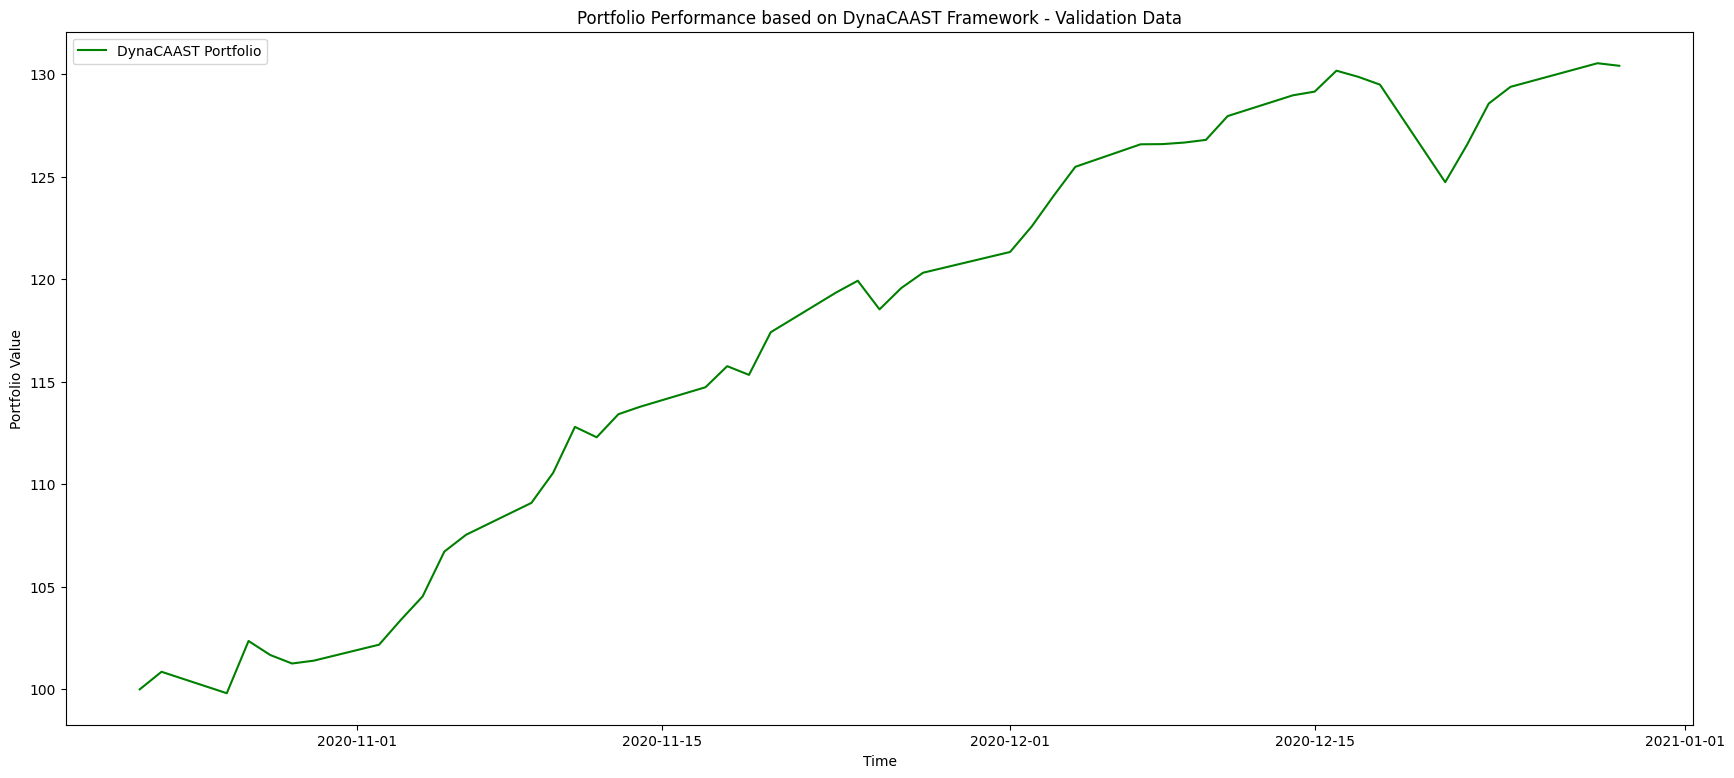

Final Portfolio Value: 130.40
Total Return: 30.40
Annualized Return: 302.86%
Sharpe Ratio: 8.9464
Maximum draw down(%): -4.1749


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []
dyna_valid_cum_returns = []

for i in range(1, len(valid_data_dyna)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = valid_data_dyna['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)
    dyna_valid_cum_returns.append(capital)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(valid_data_dyna.index[1:], portfolio_values, label="DynaCAAST Portfolio", color="green")
plt.title("Portfolio Performance based on DynaCAAST Framework - Validation Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()


# Calculate performance metrics
final_value_valid_dyna = capital
total_return_valid_dyna = final_value_valid_dyna - initial_capital
sharpe_ratio_valid_dyna = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_valid_dyna = (final_value_valid_dyna / initial_capital) ** (1 / (len(valid_data_dyna) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_valid_dyna = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_valid_dyna:.2f}")
print(f"Total Return: {total_return_valid_dyna:.2f}")
print(f"Annualized Return: {annualized_return_valid_dyna * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_valid_dyna:.4f}")
print(f"Maximum draw down(%): {maxdraw_valid_dyna:.4f}")

### **Buy and Hold Strategy on validation data**

Next we evaluate the performance of a buy and hold strategy on validation dataset.

In [ ]:
orig_data_values = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
prev_portfolio_value = 100
orig_portfolio_value = 100
buyNhold_values = []
buyNhold_returns = []
shares = np.array([.1, .1, .1])

for i in range(len(prices_valid_data)):

    if i == 0:
      orig_data_values = np.array(prices_valid_data[tickers_wo_cash].iloc[i,:].copy())
      shares = np.array((1/orig_data_values) * orig_portfolio_value)
    else:
      data_values = np.array(prices_valid_data[tickers_wo_cash].iloc[i,:].copy())
      new_portfolio_value = np.sum(data_values * shares)
      portfolio_return = new_portfolio_value/prev_portfolio_value -1
      prev_portfolio_value = new_portfolio_value
      buyNhold_values.append(new_portfolio_value)
      buyNhold_returns.append(portfolio_return)

In [ ]:
valid_data_buyNhold = pd.DataFrame({'daily_return':buyNhold_returns[:],
                               'Date':list(valid_data_lstm.date.unique()) })

In [ ]:
valid_data_buyNhold.set_index(['Date'], inplace=True)

We visualize the performance of buy and hold strategy on validation data.

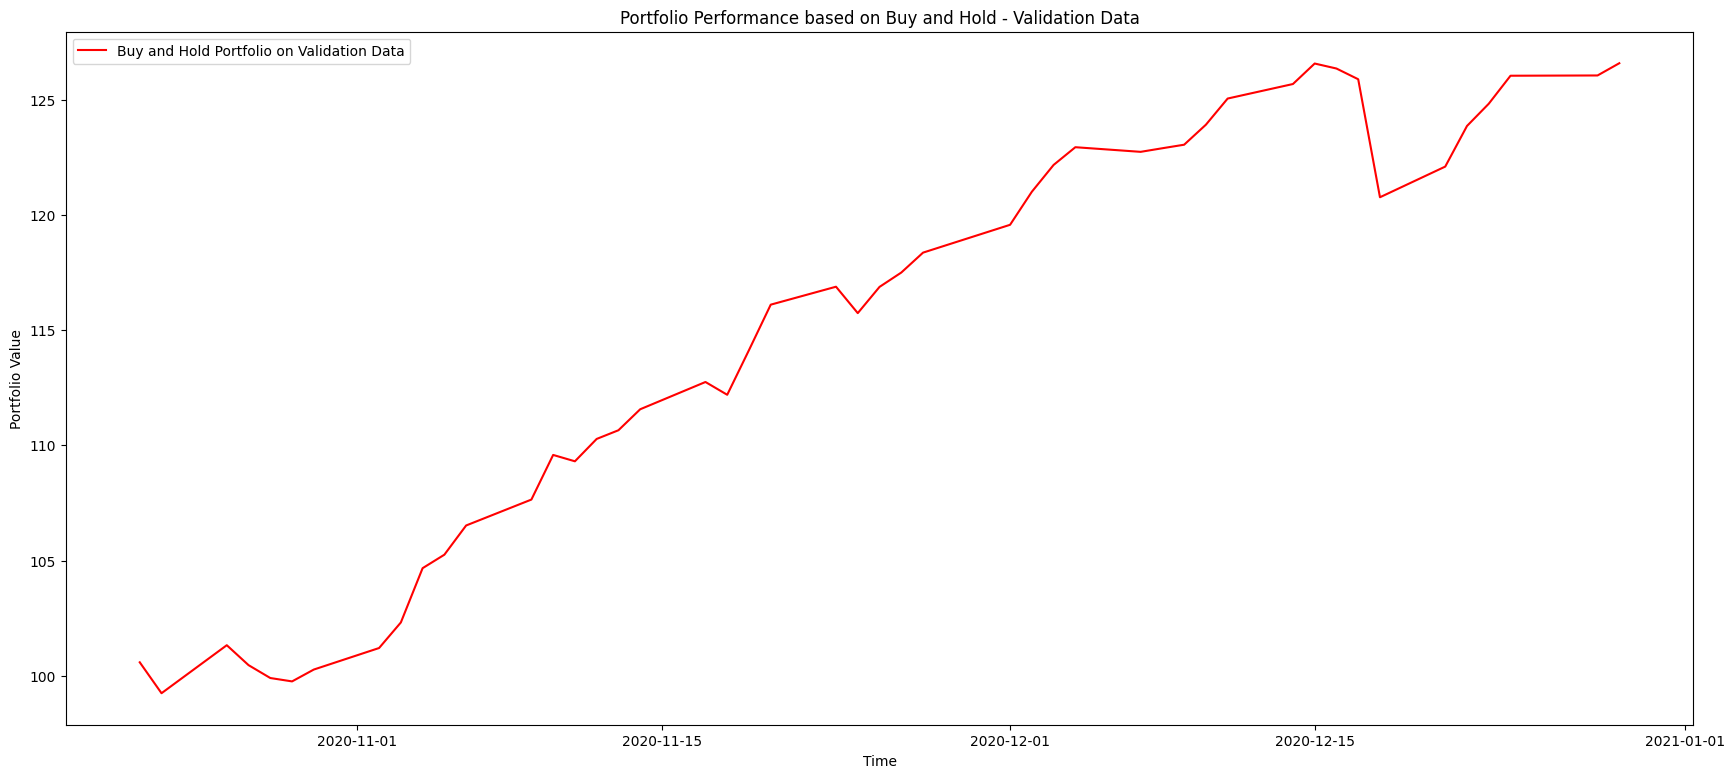

Final Portfolio Value: 126.58
Total Return: 26.58
Annualized Return: 244.66%
Sharpe Ratio: 7.8920
Maximum draw down(%): -4.5840


In [ ]:
capital = initial_capital
portfolio_values = []
portfolio_returns = []
BuyNhold_valid_cum_returns = []

for i in range(1, len(valid_data_buyNhold)):
    # Calculate portfolio returns based on the weighted sum of security returns
    portfolio_return = valid_data_buyNhold['daily_return'].iloc[i]
    capital *= (1 + portfolio_return)
    portfolio_values.append(capital)
    portfolio_returns.append(portfolio_return)
    BuyNhold_valid_cum_returns.append(capital)

# Plot the portfolio value over time
plt.figure(figsize=(21, 9))
plt.plot(valid_data_dyna.index[1:], portfolio_values, label="Buy and Hold Portfolio on Validation Data", color="red")
plt.title("Portfolio Performance based on Buy and Hold - Validation Data")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()


# Calculate performance metrics
final_value_valid_buyNhold = capital
total_return_valid_buyNhold = final_value_valid_buyNhold - initial_capital
sharpe_ratio_valid_buyNhold = np.mean(portfolio_returns) / np.std(portfolio_returns)*np.sqrt(252)
annualized_return_valid_buyNhold = (final_value_valid_buyNhold / initial_capital) ** (1 / (len(valid_data_buyNhold) / 252)) - 1  # Assuming daily returns (252 trading days)
maxdraw_valid_buyNhold = getMaxDrawdown(pd.DataFrame(portfolio_values), 252)[1].min().values[0]*100

print(f"Final Portfolio Value: {final_value_valid_buyNhold:.2f}")
print(f"Total Return: {total_return_valid_buyNhold:.2f}")
print(f"Annualized Return: {annualized_return_valid_buyNhold * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_valid_buyNhold:.4f}")
print(f"Maximum draw down(%): {maxdraw_valid_buyNhold:.4f}")

### Comparison of buy and hold versus DynaCAAST Framework

We finally compare the buy and hold and DynaCAAST on validation dataset.

In [ ]:
dyna_valid_cum_returnsDF = pd.DataFrame({"DynaCAAST Framework": dyna_valid_cum_returns}, index = valid_data_dyna[1:].index)
BuyNhold_valid_cum_returnsDF = pd.DataFrame({"Buy and Hold Strategy" : BuyNhold_valid_cum_returns}, index = valid_data_dyna[1:].index)

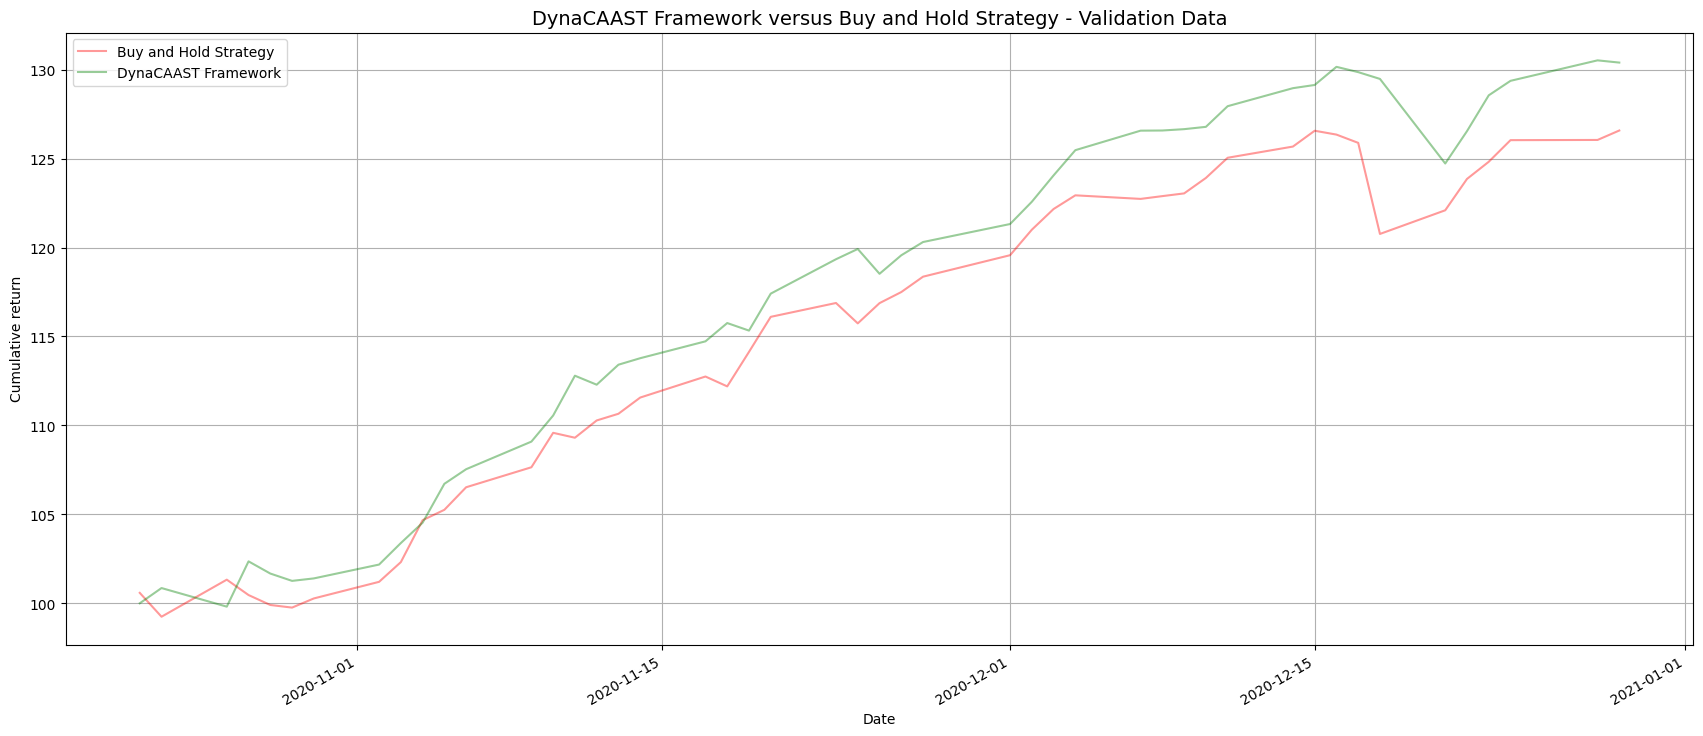

In [ ]:
%matplotlib inline
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(21,9))
BuyNhold_valid_cum_returnsDF.plot(ax=ax, color='red', alpha=.4)
dyna_valid_cum_returnsDF.plot(ax=ax, color='green', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("Cumulative return");
ax.set_title("DynaCAAST Framework versus Buy and Hold Strategy - Validation Data", fontsize=14);

# **End of Capstone Project (MScFE690)**

<hr style='border:2px solid black'>